<a href="https://colab.research.google.com/github/pritamiiit/Brain-Stroke-using-Shapley-and-Ensemble/blob/main/Shapley_and_Ensemble_Brain_Strock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [2]:
# The libraries used in processing the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import missingno as msno

from sklearn.preprocessing import StandardScaler

import seaborn as sns

from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# EDA

In [5]:
df=pd.read_csv("/content/drive/MyDrive/full_data.csv")

In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [8]:
print(df.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [9]:
df['smoking_status'].value_counts()

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [10]:
df.drop(df.index[(df["smoking_status"] == "Unknown")],axis=0,inplace=True)

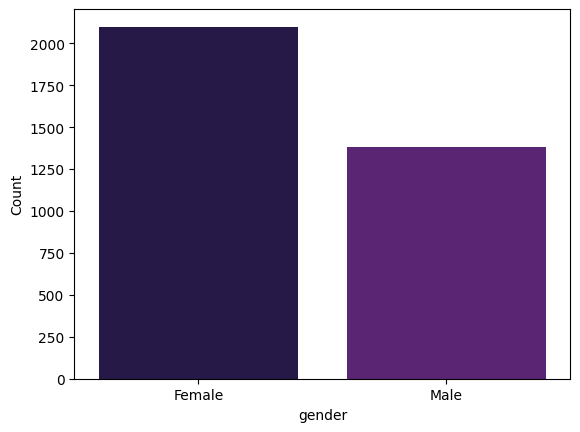

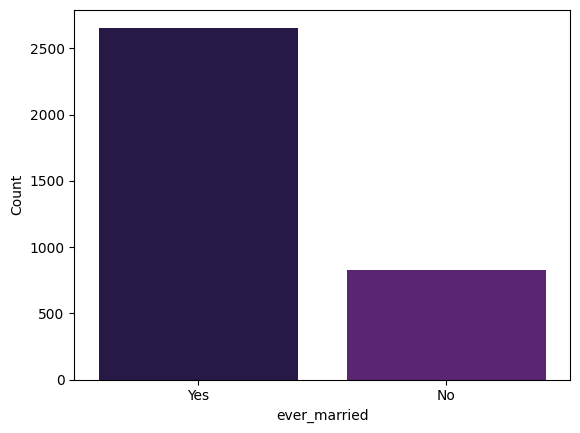

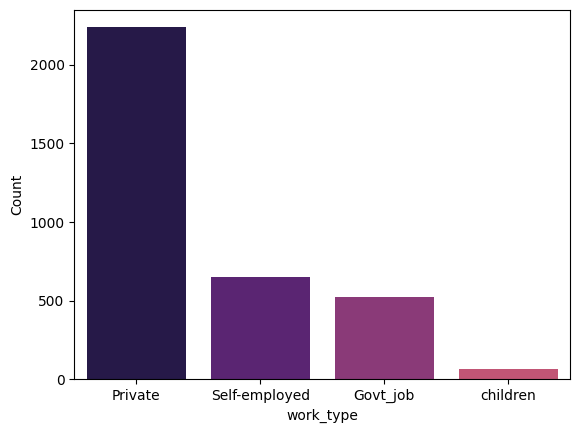

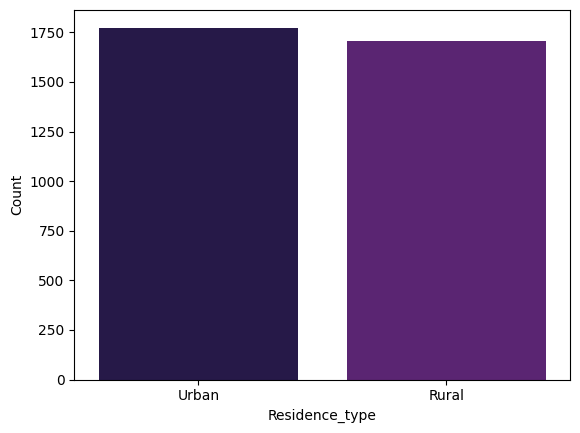

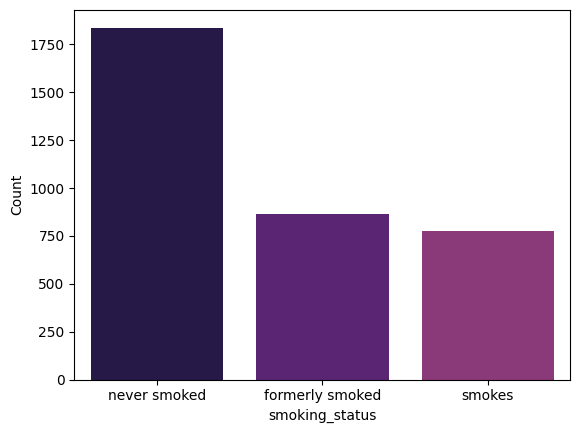

In [11]:
category_cols = df.select_dtypes(include=['object'])
sns.set_palette('magma')
for col in category_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3481 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3481 non-null   object 
 1   age                3481 non-null   float64
 2   hypertension       3481 non-null   int64  
 3   heart_disease      3481 non-null   int64  
 4   ever_married       3481 non-null   object 
 5   work_type          3481 non-null   object 
 6   Residence_type     3481 non-null   object 
 7   avg_glucose_level  3481 non-null   float64
 8   bmi                3481 non-null   float64
 9   smoking_status     3481 non-null   object 
 10  stroke             3481 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 326.3+ KB


In [13]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3481.000000,3481.00000,3481.000000,3481.000000,3481.000000,3481.000000
mean,49.067509,0.12324,0.065211,108.769155,29.808159,0.057742
std,18.894255,0.32876,0.246934,48.133475,6.228310,0.233288
min,10.000000,0.00000,0.000000,55.120000,14.100000,0.000000
25%,34.000000,0.00000,0.000000,77.450000,25.300000,0.000000
50%,50.000000,0.00000,0.000000,92.490000,29.100000,0.000000
75%,64.000000,0.00000,0.000000,116.250000,33.500000,0.000000
max,82.000000,1.00000,1.000000,271.740000,48.900000,1.000000


In [14]:
# Check for duplicate information
df.duplicated().any()

False

In [15]:
df['gender'].value_counts()

Female    2099
Male      1382
Name: gender, dtype: int64

In [16]:
df["gender"] = df["gender"].replace("Female", 1).replace("Male", 0)

In [17]:
df['ever_married'].value_counts()

Yes    2656
No      825
Name: ever_married, dtype: int64

In [18]:
df["ever_married"] = df["ever_married"].replace("Yes", 1).replace("No", 0)

In [19]:
df['work_type'].value_counts()

Private          2237
Self-employed     651
Govt_job          524
children           69
Name: work_type, dtype: int64

In [20]:
df["work_type"] = df["work_type"].replace("Private", 0).replace("Self-employed", 1).replace("children", 2).replace("Govt_job", 3)

In [21]:
df['Residence_type'].value_counts()

Urban    1774
Rural    1707
Name: Residence_type, dtype: int64

In [22]:
df["Residence_type"] = df["Residence_type"].replace("Urban", 1).replace("Rural", 0)

In [23]:
df['smoking_status'].value_counts()

never smoked       1838
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [24]:
df["smoking_status"] = df["smoking_status"].replace("never smoked", 0).replace("formerly smoked", 1).replace("smokes", 2)

In [25]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,1,1
1,0,80.0,0,1,1,0,0,105.92,32.5,0,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,0,1
4,0,81.0,0,0,1,0,1,186.21,29.0,1,1


In [26]:
df['smoking_status'].value_counts()

0    1838
1     867
2     776
Name: smoking_status, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3481 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3481 non-null   int64  
 1   age                3481 non-null   float64
 2   hypertension       3481 non-null   int64  
 3   heart_disease      3481 non-null   int64  
 4   ever_married       3481 non-null   int64  
 5   work_type          3481 non-null   int64  
 6   Residence_type     3481 non-null   int64  
 7   avg_glucose_level  3481 non-null   float64
 8   bmi                3481 non-null   float64
 9   smoking_status     3481 non-null   int64  
 10  stroke             3481 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 326.3 KB


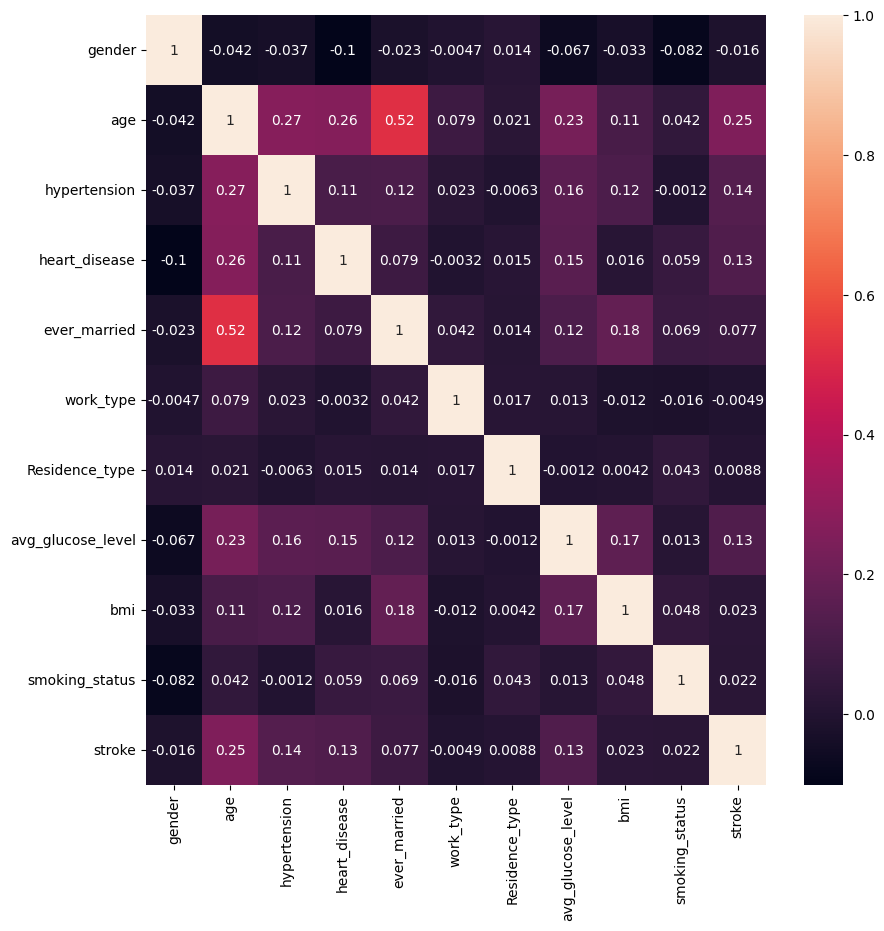

In [28]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True,)
plt.show()

Text(0.5, 1.0, 'Female = 1 & Male = 0')

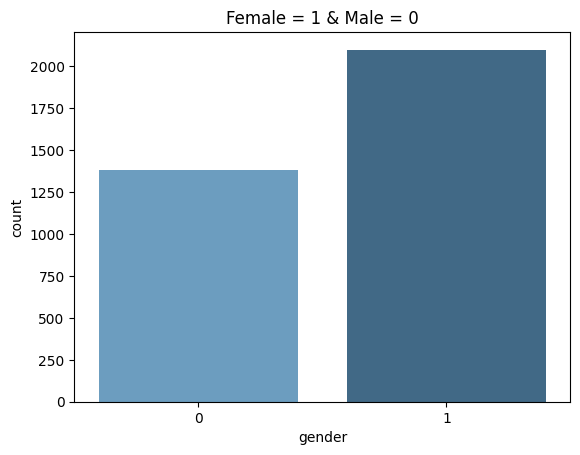

In [29]:
ax = sns.countplot(x="gender", data=df, palette="Blues_d")
plt.title("Female = 1 & Male = 0")

Text(0.5, 1.0, "0 = Doesn't have hypertension & 1 = Have hypertension")

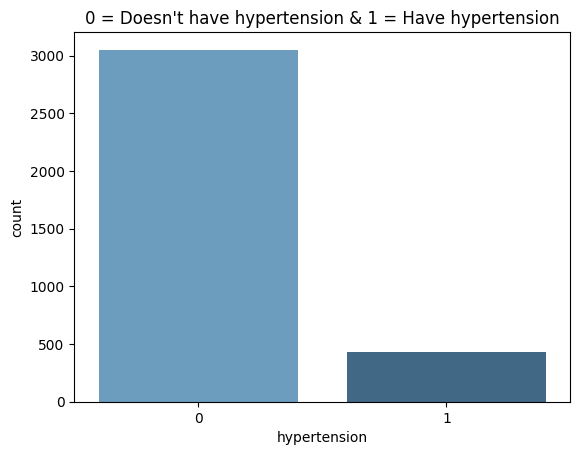

In [30]:
ax = sns.countplot(x="hypertension", data=df, palette="Blues_d")
plt.title("0 = Doesn't have hypertension & 1 = Have hypertension")

Text(0.5, 1.0, "0 = Doesn't have heart disease & 1 = Have heart disease")

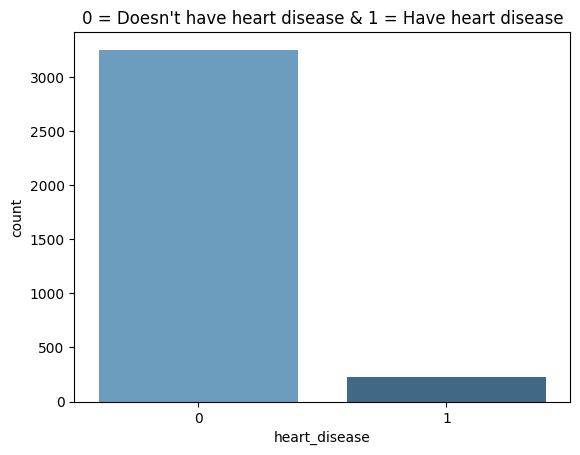

In [31]:
ax = sns.countplot(x="heart_disease", data=df, palette="Blues_d")
plt.title("0 = Doesn't have heart disease & 1 = Have heart disease")

Text(0.5, 1.0, "0 = Doesn't married & 1 = Ever married")

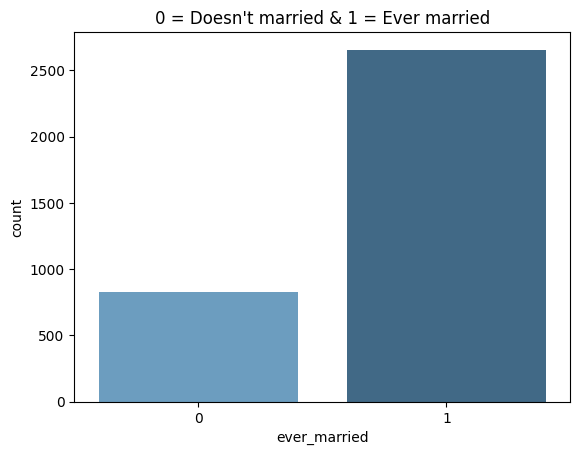

In [32]:
ax = sns.countplot(x="ever_married", data=df, palette="Blues_d")
plt.title("0 = Doesn't married & 1 = Ever married")

Text(0.5, 1.0, '0 = Private & 1 = Self-employed & 2 = children & 3 = Govt_job')

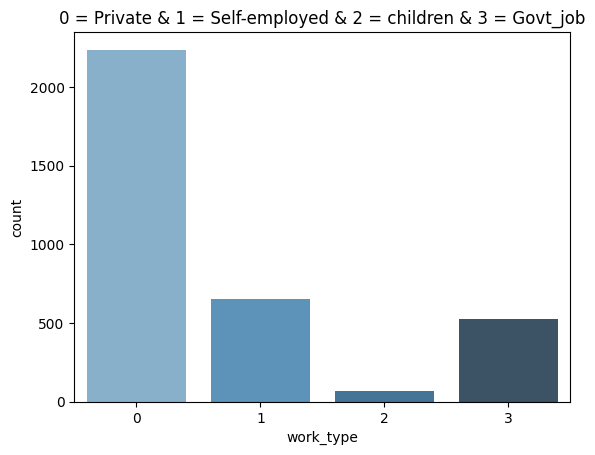

In [33]:
ax = sns.countplot(x="work_type", data=df, palette="Blues_d")
plt.title("0 = Private & 1 = Self-employed & 2 = children & 3 = Govt_job")

Text(0.5, 1.0, '0 = Rural & 1 = Urban')

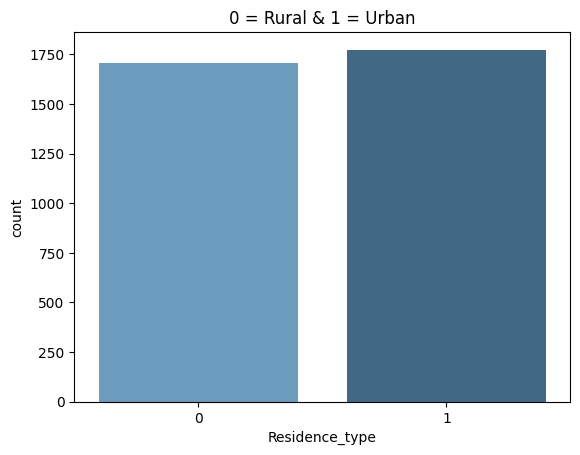

In [34]:
ax = sns.countplot(x="Residence_type", data=df, palette="Blues_d")
plt.title("0 = Rural & 1 = Urban")

Text(0.5, 1.0, '0 = never smoked & 1 = formerly smoked & 2 = smokes')

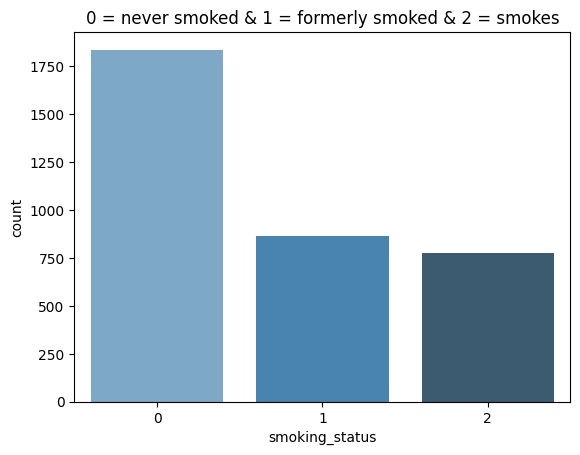

In [35]:
ax = sns.countplot(x="smoking_status", data=df, palette="Blues_d")
plt.title("0 = never smoked & 1 = formerly smoked & 2 = smokes")

In [36]:
df.groupby(['hypertension', 'heart_disease']).agg({'hypertension': 'count'})

hypertension
hypertension heart_disease              
0            0                      2884
             1                       168
1            0                       370
             1                        59

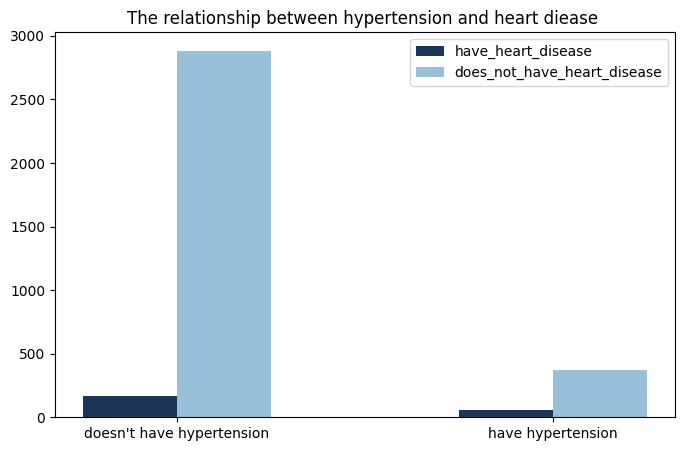

In [37]:
have_heart_disease = (168, 59)
does_not_have_heart_disease = (2884, 370)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, have_heart_disease, width, label='have_heart_disease', color="#1d3557")
plt.bar(X + width, does_not_have_heart_disease, width, label='does_not_have_heart_disease', color="#98c1d9")
plt.xticks(X + width / 2, ("doesn't have hypertension", "have hypertension"))
plt.title("The relationship between hypertension and heart diease ")
plt.legend(loc='best')

Who have Brain Stroke

In [38]:
grouped = df.groupby(df.stroke)
df_new1 = grouped.get_group(1)
df_new1

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,1,1
1,0,80.0,0,1,1,0,0,105.92,32.5,0,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,0,1
4,0,81.0,0,0,1,0,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4810,1,79.0,1,1,0,1,0,60.94,28.8,0,1
4811,1,78.0,0,0,1,1,0,60.67,27.1,1,1
4815,0,79.0,0,0,1,0,0,114.77,27.2,1,1
4817,1,76.0,1,1,1,1,1,199.86,31.7,2,1


In [39]:
df_new1['gender'].value_counts()

1    115
0     86
Name: gender, dtype: int64

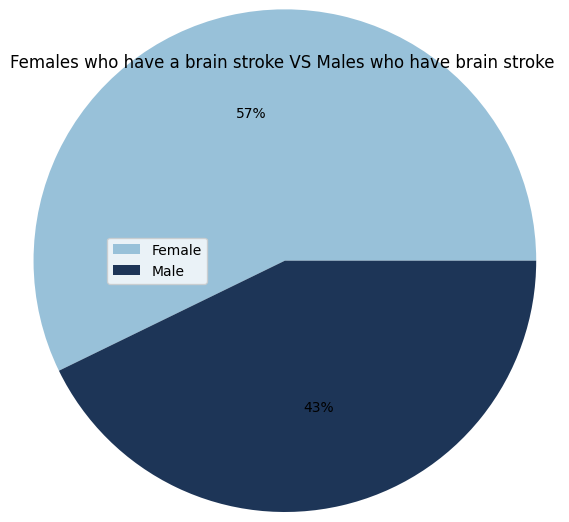

In [40]:
gender=[115, 86]
plt.pie(gender,  radius=1.7, colors=["#98c1d9", "#1d3557"],
        rotatelabels=False, autopct= "%1.0f%%")
plt.title('Females who have a brain stroke VS Males who have brain stroke ')
plt.legend(labels=["Female", "Male"])

Text(0.5, 1.0, '0 = never smoked & 1 = formerly smoked & 2 = smokes')

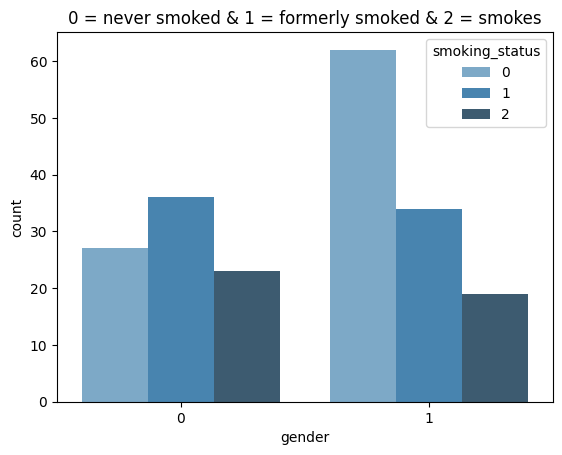

In [41]:
ax = sns.countplot(x="gender", hue = "smoking_status" ,data=df_new1, palette="Blues_d")
plt.title("0 = never smoked & 1 = formerly smoked & 2 = smokes")

In [42]:
df_new1.groupby(['gender', 'hypertension']).agg({'hypertension': 'count'})

hypertension
gender hypertension              
0      0                       61
       1                       25
1      0                       78
       1                       37

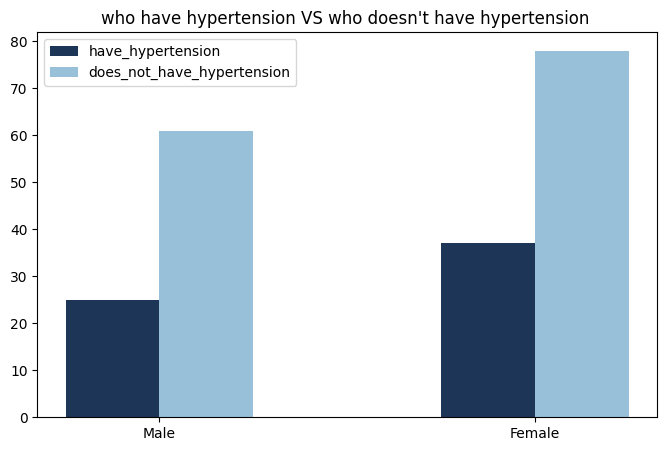

In [43]:
have_hypertension = (25, 37)
does_not_have_hypertension = (61,78)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, have_hypertension, width, label='have_hypertension', color="#1d3557")
plt.bar(X + width, does_not_have_hypertension, width, label='does_not_have_hypertension', color="#98c1d9")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.title("who have hypertension VS who doesn't have hypertension ")
plt.legend(loc='best')

In [44]:
df_new1.groupby(['gender', 'heart_disease']).agg({'heart_disease': 'count'})

heart_disease
gender heart_disease               
0      0                         63
       1                         23
1      0                         99
       1                         16

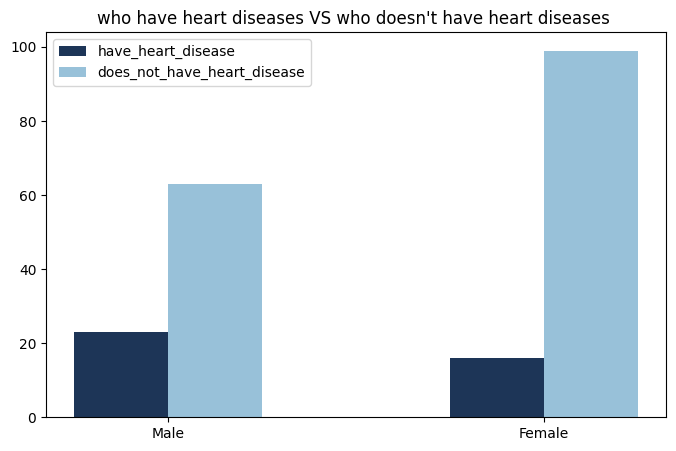

In [45]:
have_heart_disease = (23, 16)
does_not_have_heart_disease = (63, 99)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, have_heart_disease, width, label='have_heart_disease', color="#1d3557")
plt.bar(X + width, does_not_have_heart_disease, width, label='does_not_have_heart_disease', color="#98c1d9")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.title("who have heart diseases VS who doesn't have heart diseases ")
plt.legend(loc='best')

In [46]:
df_new1.groupby(['gender', 'ever_married']).agg({'ever_married': 'count'})

ever_married
gender ever_married              
0      0                        6
       1                       80
1      0                       15
       1                      100

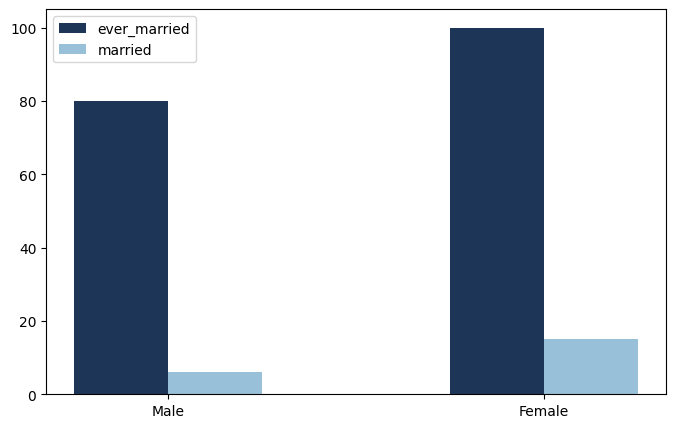

In [47]:
ever_married = (80, 100)
married = (6, 15)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, ever_married, width, label='ever_married', color="#1d3557")
plt.bar(X + width, married, width, label='married', color="#98c1d9")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.legend(loc='best')

In [48]:
df_new1.groupby(['gender', 'work_type']).agg({'work_type': 'count'})

work_type
gender work_type           
0      0                 57
       1                 21
       3                  8
1      0                 62
       1                 36
       3                 17

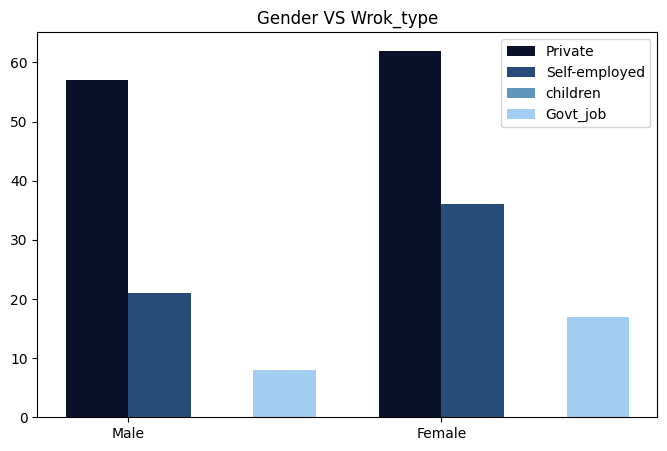

In [49]:
Private = (57, 62)
Self_employed = (21,36)
children = (0 , 0)
Govt_job = (8, 17)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.20
plt.bar(X, Private, width, label='Private', color="#0a1128")
plt.bar(X+width, Self_employed, width, label='Self-employed', color="#274c77")
plt.bar(X+2*width, children, width, label='children', color="#6096ba")
plt.bar(X+3* width, Govt_job, width, label='Govt_job', color="#a3cef1")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.title("Gender VS Wrok_type")
plt.legend(loc='best')

In [50]:
df_new1.groupby(['gender', 'Residence_type']).agg({'smoking_status': 'count'})

smoking_status
gender Residence_type                
0      0                           41
       1                           45
1      0                           54
       1                           61

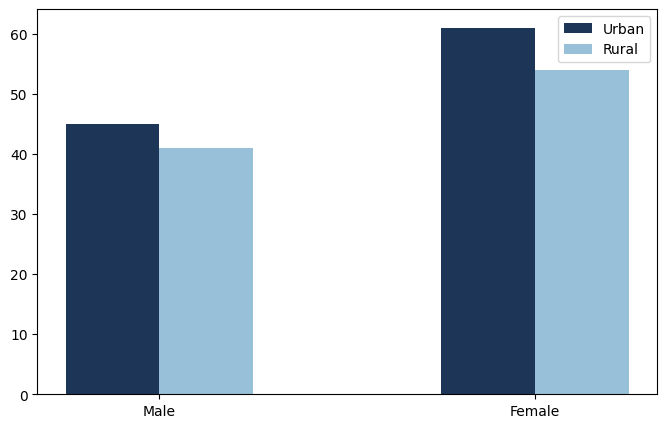

In [51]:
Urban = (45, 61)
Rural = (41, 54)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, Urban, width, label='Urban', color="#1d3557")
plt.bar(X + width, Rural, width, label='Rural', color="#98c1d9")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.legend(loc='best')

In [52]:
df_new1.groupby(['gender', 'smoking_status']).agg({'smoking_status': 'count'})

smoking_status
gender smoking_status                
0      0                           27
       1                           36
       2                           23
1      0                           62
       1                           34
       2                           19

Text(0.5, 1.0, 'Gender VS smoking_status')

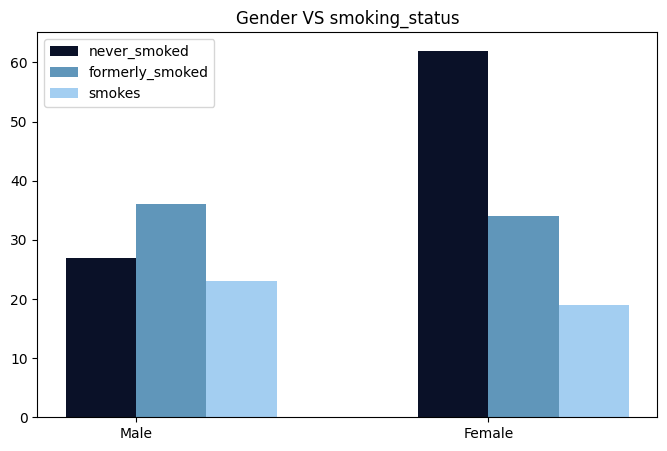

In [53]:
never_smoked  = (27, 62)
formerly_smoked = (36 , 34)
smokes = (23 , 19)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.20
plt.bar(X, never_smoked, width, label='never_smoked', color="#0a1128")
plt.bar(X+width, formerly_smoked, width, label='formerly_smoked', color="#6096ba")
plt.bar(X+2* width, smokes, width, label='smokes', color="#a3cef1")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.legend(loc='best')
plt.title("Gender VS smoking_status")

Who have Brain Stroke

In [54]:
grouped = df.groupby(df.stroke)
df_new2 = grouped.get_group(0)
df_new2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
209,0,58.0,1,0,1,0,1,87.96,39.2,0,0
211,1,70.0,0,0,1,0,0,69.04,35.9,1,0
212,1,52.0,0,0,1,0,1,77.59,17.7,1,0
213,1,75.0,0,1,1,1,0,243.53,27.0,0,0
214,1,32.0,0,0,1,0,0,77.67,32.3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41.0,0,0,0,0,0,70.15,29.8,1,0
4977,0,40.0,0,0,1,0,1,191.15,31.1,2,0
4978,1,45.0,1,0,1,3,0,95.02,31.8,2,0
4979,0,40.0,0,0,1,0,0,83.94,30.0,2,0


In [55]:
df_new2['gender'].value_counts()

1    1984
0    1296
Name: gender, dtype: int64

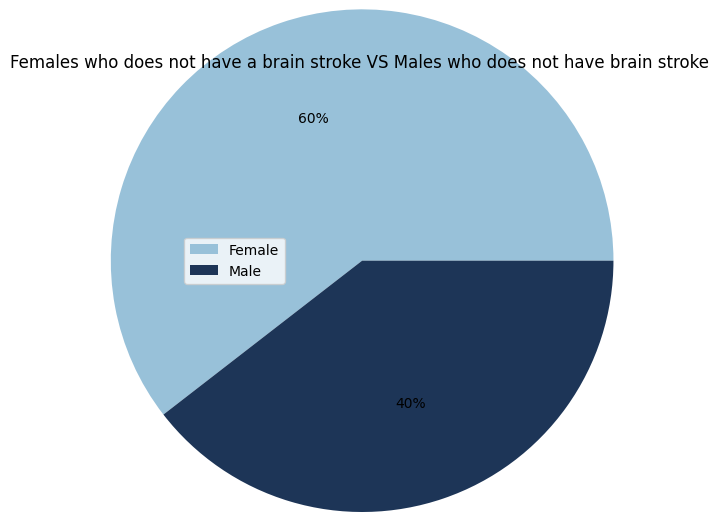

In [56]:
gender=[1984, 1296]
plt.pie(gender,  radius=1.7, colors=["#98c1d9", "#1d3557"],
        rotatelabels=False, autopct= "%1.0f%%")
plt.title('Females who does not have a brain stroke VS Males who does not have brain stroke ')
plt.legend(labels=["Female", "Male"])

In [57]:
df_new2.groupby(['gender', 'hypertension']).agg({'hypertension': 'count'})

hypertension
gender hypertension              
0      0                     1130
       1                      166
1      0                     1783
       1                      201

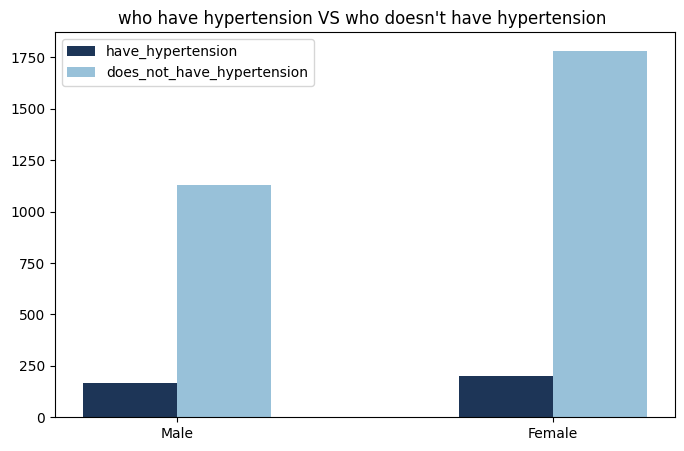

In [58]:
have_hypertension = (166, 201)
does_not_have_hypertension = (1130, 1783)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, have_hypertension, width, label='have_hypertension', color="#1d3557")
plt.bar(X + width, does_not_have_hypertension, width, label='does_not_have_hypertension', color="#98c1d9")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.title("who have hypertension VS who doesn't have hypertension ")
plt.legend(loc='best')

In [59]:
df_new2.groupby(['gender', 'heart_disease']).agg({'heart_disease': 'count'})

heart_disease
gender heart_disease               
0      0                       1186
       1                        110
1      0                       1906
       1                         78

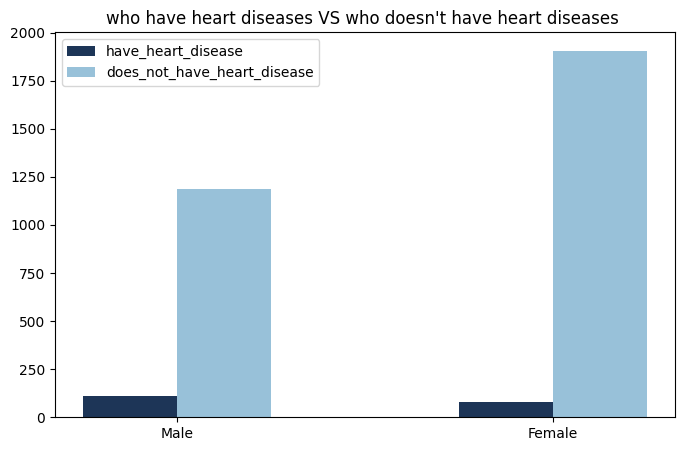

In [60]:
have_heart_disease = (110, 78)
does_not_have_heart_disease = (1186, 1906)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, have_heart_disease, width, label='have_heart_disease', color="#1d3557")
plt.bar(X + width, does_not_have_heart_disease, width, label='does_not_have_heart_disease', color="#98c1d9")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.title("who have heart diseases VS who doesn't have heart diseases ")
plt.legend(loc='best')

In [61]:
df_new2.groupby(['gender', 'ever_married']).agg({'ever_married': 'count'})

ever_married
gender ever_married              
0      0                      305
       1                      991
1      0                      499
       1                     1485

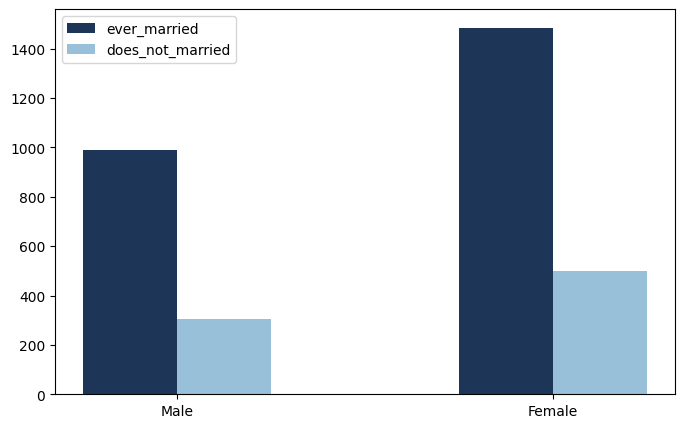

In [62]:
ever_married = (991, 1485)
does_not_married = (305, 499)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, ever_married, width, label='ever_married', color="#1d3557")
plt.bar(X + width, does_not_married, width, label='does_not_married', color="#98c1d9")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.legend(loc='best')

In [63]:
df_new2.groupby(['gender', 'work_type']).agg({'work_type': 'count'})

work_type
gender work_type           
0      0                836
       1                222
       2                 35
       3                203
1      0               1282
       1                372
       2                 34
       3                296

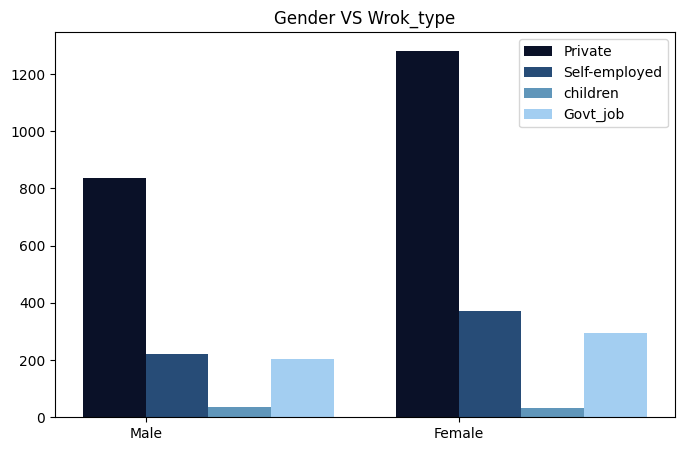

In [64]:
Private = (836, 1282)
Self_employed = (222,372)
children = (35 , 34)
Govt_job = (203 , 296)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.20
plt.bar(X, Private, width, label='Private', color="#0a1128")
plt.bar(X+width, Self_employed, width, label='Self-employed', color="#274c77")
plt.bar(X+2*width, children, width, label='children', color="#6096ba")
plt.bar(X+3* width, Govt_job, width, label='Govt_job', color="#a3cef1")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.title("Gender VS Wrok_type")
plt.legend(loc='best')

In [65]:
df_new2.groupby(['gender', 'Residence_type']).agg({'smoking_status': 'count'})

smoking_status
gender Residence_type                
0      0                          649
       1                          647
1      0                          963
       1                         1021

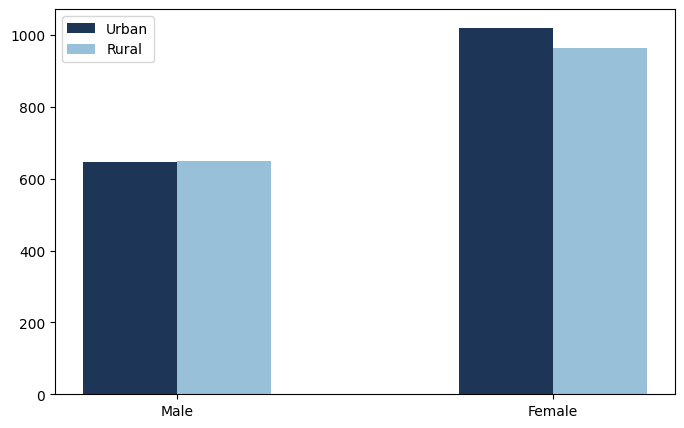

In [66]:
Urban = (647, 1021)
Rural = (649, 963)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.25
plt.bar(X, Urban, width, label='Urban', color="#1d3557")
plt.bar(X + width, Rural, width, label='Rural', color="#98c1d9")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.legend(loc='best')

In [67]:
df_new2.groupby(['gender', 'smoking_status']).agg({'smoking_status': 'count'})

smoking_status
gender smoking_status                
0      0                          617
       1                          367
       2                          312
1      0                         1132
       1                          430
       2                          422

Text(0.5, 1.0, 'Gender VS smoking_status')

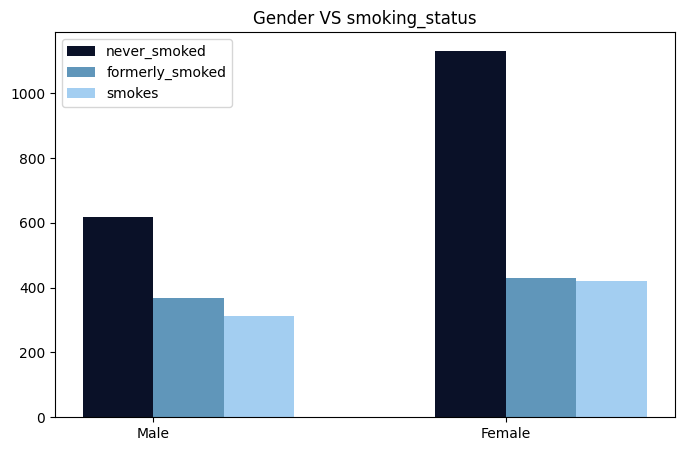

In [68]:
never_smoked  = (617, 1132)
formerly_smoked = (367 , 430)
smokes = (312 , 422)
X = np.arange(2)
plt.figure(figsize=(8, 5))
width = 0.20
plt.bar(X, never_smoked, width, label='never_smoked', color="#0a1128")
plt.bar(X+width, formerly_smoked, width, label='formerly_smoked', color="#6096ba")
plt.bar(X+2* width, smokes, width, label='smokes', color="#a3cef1")
plt.xticks(X + width / 2, ("Male", "Female"))
plt.legend(loc='best')
plt.title("Gender VS smoking_status")

In [69]:
# y includes our labels and data includes our features
y = df.stroke
list = ['stroke']
x = df.drop(list,axis = 1 )
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,67.0,0,1,1,0,1,228.69,36.6,1
1,0,80.0,0,1,1,0,0,105.92,32.5,0
2,1,49.0,0,0,1,0,1,171.23,34.4,2
3,1,79.0,1,0,1,1,0,174.12,24.0,0
4,0,81.0,0,0,1,0,1,186.21,29.0,1


Checking Imabalanced Dataset

In [70]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,0,1,228.69,36.6,1,1
1,0,80.0,0,1,1,0,0,105.92,32.5,0,1
2,1,49.0,0,0,1,0,1,171.23,34.4,2,1
3,1,79.0,1,0,1,1,0,174.12,24.0,0,1
4,0,81.0,0,0,1,0,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,0,41.0,0,0,0,0,0,70.15,29.8,1,0
4977,0,40.0,0,0,1,0,1,191.15,31.1,2,0
4978,1,45.0,1,0,1,3,0,95.02,31.8,2,0
4979,0,40.0,0,0,1,0,0,83.94,30.0,2,0


# Col Extraction

In [71]:
#Making small datasets from our own data set which will contain one feature and the outout

# Load your dataset into a DataFrame
original_data = df

# Create 9 separate datasets combining each column with the 10th column
num_cols = len(original_data.columns)  # Assuming there are 10 columns in total

for i in range(1, num_cols):
    new_dataset = original_data.iloc[:, [i - 1, -1]]  # Selecting ith column and the 10th column
    new_dataset.to_csv(f'dataset_{i}.csv', index=False)  # Save each new dataset to a CSV file


In [72]:
df1=pd.read_csv("/content/dataset_1.csv")
df2=pd.read_csv("/content/dataset_2.csv")
df3=pd.read_csv("/content/dataset_3.csv")
df4=pd.read_csv("/content/dataset_4.csv")
df5=pd.read_csv("/content/dataset_5.csv")
df6=pd.read_csv("/content/dataset_6.csv")
df7=pd.read_csv("/content/dataset_7.csv")
df8=pd.read_csv("/content/dataset_8.csv")
df9=pd.read_csv("/content/dataset_9.csv")
df10=pd.read_csv("/content/dataset_10.csv")

In [73]:
df1

,gender,stroke
0,0,1
1,0,1
2,1,1
3,1,1
4,0,1
...,...,...
3476,0,0
3477,0,0
3478,1,0
3479,0,0


In [74]:
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()
df6.info()
df7.info()
df8.info()
df9.info()
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gender  3481 non-null   int64
 1   stroke  3481 non-null   int64
dtypes: int64(2)
memory usage: 54.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     3481 non-null   float64
 1   stroke  3481 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 54.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   hypertension  3481 non-null   int64
 1   stroke        3481 non-null   int64
dtypes: int64(2)
memory usage: 54.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 2 colum

In [75]:
X1 = df1.drop(columns=['stroke'])
X2 = df2.drop(columns=['stroke'])
X3 = df3.drop(columns=['stroke'])
X4 = df4.drop(columns=['stroke'])
X5 = df5.drop(columns=['stroke'])
X6 = df6.drop(columns=['stroke'])
X7 = df7.drop(columns=['stroke'])
X8 = df8.drop(columns=['stroke'])
X9 = df9.drop(columns=['stroke'])
X10 = df10.drop(columns=['stroke'])
y = df['stroke']

In [76]:
X1

,gender
0,0
1,0
2,1
3,1
4,0
...,...
3476,0
3477,0
3478,1
3479,0


In [77]:
categorical_features = [
    'hypertension',
    'heart_disease',
    'ever_married',
    'female',
    'male',
    'government_work',
    'never_worked',
    'private_work',
    'self_employed',
    'children_work',
    'rural_resident',
    'urban_resident',
    'smoking_unknown',
    'formerly_smoked',
    'never_smoked',
    'smokes'
]

In [78]:
X1.shape

(3481, 1)

In [79]:
print(X1.shape)  # Check the shape of X1
print(X1.head())  # Display the first few rows of X1

# Check the data type of X1 (should be a pandas DataFrame or a numpy array)
print(type(X1))

# Check the column names/types if X1 is a DataFrame
if isinstance(X1, pd.DataFrame):
    print(X1.dtypes)


(3481, 1)
   gender
0       0
1       0
2       1
3       1
4       0
<class 'pandas.core.frame.DataFrame'>
gender    int64
dtype: object


# Preference

Col 1

In [80]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
X1_array = X1.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(X1)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
X1_combined = np.concatenate((X1_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(X1_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


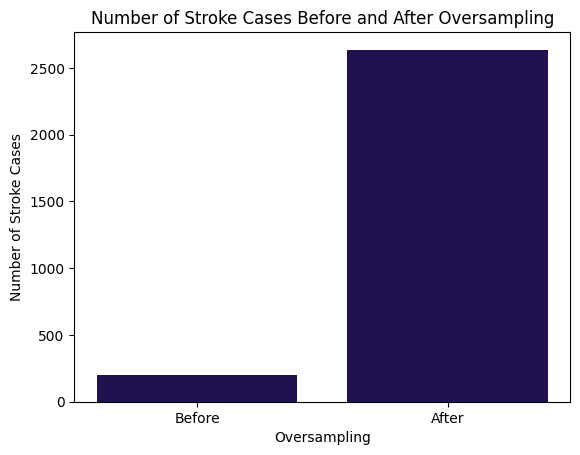

In [81]:
num_stroke_before = y.sum()
num_stroke_after = y_resampled.sum()

plt.bar(['Before', 'After'], [num_stroke_before, num_stroke_after])
plt.title('Number of Stroke Cases Before and After Oversampling')
plt.xlabel('Oversampling')
plt.ylabel('Number of Stroke Cases')
plt.show()

train and test

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)

In [83]:
y_resampled.value_counts()

0    2636
1    2636
Name: stroke, dtype: int64

In [84]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Baise": GaussianNB(),
    "Ada Boost": AdaBoostClassifier(),
    "Multinomial-Naïve-Bayes-Classifier":MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network trained.
Random Forest trained.
Naive Baise trained.
Ada Boost trained.
Multinomial-Naïve-Bayes-Classifier trained.
ExtraTreesClassifier trained.


In [85]:
accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]

Logistic Regression Accuracy: 50.759%
				Precision: 50.460%
				   Recall: 48.855%
				 F1-Score: 49.644%

K-Nearest Neighbors Accuracy: 89.317%
				Precision: 83.424%
				   Recall: 97.964%
				 F1-Score: 90.111%

Decision Tree Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Support Vector Machine (Linear Kernel) Accuracy: 50.822%
				Precision: 50.525%
				   Recall: 48.982%
				 F1-Score: 49.742%

Support Vector Machine (RBF Kernel) Accuracy: 65.929%
				Precision: 63.799%
				   Recall: 72.646%
				 F1-Score: 67.936%

Neural Network Accuracy: 67.320%
				Precision: 64.604%
				   Recall: 75.700%
				 F1-Score: 69.713%

Random Forest Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Naive Baise Accuracy: 51.833%
				Precision: 51.449%
				   Recall: 54.198%
				 F1-Score: 52.788%

Ada Boost Accuracy: 63.464%
				Precision: 60.833%
				   Recall: 74.300%
				 F1-Score: 66.896%

Multinomial-Naïve-Ba

Col2


In [86]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
X2_array = X2.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(X2)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
X2_combined = np.concatenate((X2_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(X2_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)

In [88]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Baise": GaussianNB(),
    "Ada Boost": AdaBoostClassifier(),
    "Multinomial-Naïve-Bayes-Classifier":MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")

Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Naive Baise trained.
Ada Boost trained.
Multinomial-Naïve-Bayes-Classifier trained.
ExtraTreesClassifier trained.


In [89]:
accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]

Logistic Regression Accuracy: 72.630%
				Precision: 70.838%
				   Recall: 76.336%
				 F1-Score: 73.484%

K-Nearest Neighbors Accuracy: 90.898%
				Precision: 85.352%
				   Recall: 98.601%
				 F1-Score: 91.499%

Decision Tree Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Support Vector Machine (Linear Kernel) Accuracy: 50.316%
				Precision: 0.000%
				   Recall: 0.000%
				 F1-Score: 0.000%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine (RBF Kernel) Accuracy: 73.894%
				Precision: 70.653%
				   Recall: 81.170%
				 F1-Score: 75.548%

Neural Network Accuracy: 73.767%
				Precision: 71.798%
				   Recall: 77.735%
				 F1-Score: 74.649%

Random Forest Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Naive Baise Accuracy: 73.515%
				Precision: 69.881%
				   Recall: 82.061%
				 F1-Score: 75.483%

Ada Boost Accuracy: 76.169%
				Precision: 73.003%
				   Recall: 82.570%
				 F1-Score: 77.493%

Multinomial-Naïve-Bayes-Classifier Accuracy: 64.412%
				Precision: 63.072%
				   Recall: 68.448%
				 F1-Score: 65.650%

ExtraTreesClassifier Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%



Col3

In [90]:
# @title Default title text
# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
X3_array = X3.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(X3)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
X3_combined = np.concatenate((X3_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(X3_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Baise": GaussianNB(),
    "Ada Boost": AdaBoostClassifier(),
    "Multinomial-Naïve-Bayes-Classifier":MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network trained.
Random Forest trained.
Naive Baise trained.
Ada Boost trained.
Multinomial-Naïve-Bayes-Classifier trained.
ExtraTreesClassifier trained.
Logistic Regression Accuracy: 53.161%
				Precision: 52.845%
				   Recall: 53.181%
				 F1-Score: 53.012%

K-Nearest Neighbors Accuracy: 86.283%
				Precision: 79.916%
				   Recall: 96.692%
				 F1-Score: 87.507%

Decision Tree Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Support Vector Machine (Linear Kernel) Accuracy: 53.161%
				Precision: 52.845%
				   Recall: 53.181%
				 F1-Score: 53.012%

Support Vector Machine (RBF Kernel) Accuracy: 60.872%
				Precision: 57.462%
				   Recall: 81.807%
				 F1-Score: 67.507%

Neural Network Accuracy: 64.539%
				Precision: 64.045%
				   Recall: 65.267%
				 F1-Score: 64.650%

Random Forest Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Naive Baise Accuracy: 52.339%
				Precision: 52.067%
				

col4


In [91]:
# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
X4_array = X4.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(X4)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
X4_combined = np.concatenate((X4_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(X4_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Baise": GaussianNB(),
    "Ada Boost": AdaBoostClassifier(),
    "Multinomial-Naïve-Bayes-Classifier":MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network trained.
Random Forest trained.
Naive Baise trained.
Ada Boost trained.
Multinomial-Naïve-Bayes-Classifier trained.
ExtraTreesClassifier trained.
Logistic Regression Accuracy: 52.023%
				Precision: 51.628%
				   Recall: 54.453%
				 F1-Score: 53.003%

K-Nearest Neighbors Accuracy: 86.536%
				Precision: 80.906%
				   Recall: 95.420%
				 F1-Score: 87.566%

Decision Tree Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Support Vector Machine (Linear Kernel) Accuracy: 51.960%
				Precision: 51.570%
				   Recall: 54.326%
				 F1-Score: 52.912%

Support Vector Machine (RBF Kernel) Accuracy: 62.516%
				Precision: 63.058%
				   Recall: 59.288%
				 F1-Score: 61.115%

Neural Network Accuracy: 65.613%
				Precision: 64.756%
				   Recall: 67.557%
				 F1-Score: 66.127%

Random Forest Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Naive Baise Accuracy: 56.005%
				Precision: 56.181%
				

col5


In [92]:
# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
X5_array = X5.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(X5)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
X5_combined = np.concatenate((X5_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(X5_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Baise": GaussianNB(),
    "Ada Boost": AdaBoostClassifier(),
    "Multinomial-Naïve-Bayes-Classifier":MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network trained.
Random Forest trained.
Naive Baise trained.
Ada Boost trained.
Multinomial-Naïve-Bayes-Classifier trained.
ExtraTreesClassifier trained.
Logistic Regression Accuracy: 61.188%
				Precision: 56.352%
				   Recall: 97.074%
				 F1-Score: 71.308%

K-Nearest Neighbors Accuracy: 88.875%
				Precision: 82.655%
				   Recall: 98.219%
				 F1-Score: 89.767%

Decision Tree Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Support Vector Machine (Linear Kernel) Accuracy: 61.062%
				Precision: 56.232%
				   Recall: 97.583%
				 F1-Score: 71.349%

Support Vector Machine (RBF Kernel) Accuracy: 65.044%
				Precision: 59.195%
				   Recall: 95.420%
				 F1-Score: 73.064%

Neural Network Accuracy: 65.992%
				Precision: 62.229%
				   Recall: 80.280%
				 F1-Score: 70.111%

Random Forest Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Naive Baise Accuracy: 61.441%
				Precision: 56.313%
				

col6


In [93]:
# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
X6_array = X6.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(X6)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
X6_combined = np.concatenate((X6_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(X6_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Baise": GaussianNB(),
    "Ada Boost": AdaBoostClassifier(),
    "Multinomial-Naïve-Bayes-Classifier":MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network trained.
Random Forest trained.
Naive Baise trained.
Ada Boost trained.
Multinomial-Naïve-Bayes-Classifier trained.
ExtraTreesClassifier trained.
Logistic Regression Accuracy: 57.143%
				Precision: 55.844%
				   Recall: 65.649%
				 F1-Score: 60.351%

K-Nearest Neighbors Accuracy: 88.369%
				Precision: 83.296%
				   Recall: 95.802%
				 F1-Score: 89.112%

Decision Tree Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Support Vector Machine (Linear Kernel) Accuracy: 57.396%
				Precision: 55.983%
				   Recall: 66.667%
				 F1-Score: 60.859%

Support Vector Machine (RBF Kernel) Accuracy: 64.918%
				Precision: 60.784%
				   Recall: 82.824%
				 F1-Score: 70.113%

Neural Network Accuracy: 69.785%
				Precision: 66.667%
				   Recall: 78.372%
				 F1-Score: 72.047%

Random Forest Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Naive Baise Accuracy: 58.723%
				Precision: 55.510%
				

col7

In [94]:
# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
X7_array = X7.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(X7)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
X7_combined = np.concatenate((X7_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(X7_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Baise": GaussianNB(),
    "Ada Boost": AdaBoostClassifier(),
    "Multinomial-Naïve-Bayes-Classifier":MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network trained.
Random Forest trained.
Naive Baise trained.
Ada Boost trained.
Multinomial-Naïve-Bayes-Classifier trained.
ExtraTreesClassifier trained.
Logistic Regression Accuracy: 52.655%
				Precision: 52.339%
				   Recall: 52.672%
				 F1-Score: 52.505%

K-Nearest Neighbors Accuracy: 87.800%
				Precision: 81.576%
				   Recall: 97.455%
				 F1-Score: 88.812%

Decision Tree Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Support Vector Machine (Linear Kernel) Accuracy: 52.655%
				Precision: 52.339%
				   Recall: 52.672%
				 F1-Score: 52.505%

Support Vector Machine (RBF Kernel) Accuracy: 65.550%
				Precision: 63.995%
				   Recall: 70.102%
				 F1-Score: 66.910%

Neural Network Accuracy: 64.918%
				Precision: 61.871%
				   Recall: 76.590%
				 F1-Score: 68.448%

Random Forest Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Naive Baise Accuracy: 53.413%
				Precision: 53.211%
				

col8


In [95]:
# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
X8_array = X8.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(X8)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
X8_combined = np.concatenate((X8_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(X8_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Baise": GaussianNB(),
    "Ada Boost": AdaBoostClassifier(),
    "Multinomial-Naïve-Bayes-Classifier":MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Naive Baise trained.
Ada Boost trained.
Multinomial-Naïve-Bayes-Classifier trained.
ExtraTreesClassifier trained.
Logistic Regression Accuracy: 61.378%
				Precision: 63.318%
				   Recall: 52.926%
				 F1-Score: 57.658%

K-Nearest Neighbors Accuracy: 92.035%
				Precision: 86.264%
				   Recall: 99.873%
				 F1-Score: 92.571%

Decision Tree Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Support Vector Machine (Linear Kernel) Accuracy: 50.316%
				Precision: 0.000%
				   Recall: 0.000%
				 F1-Score: 0.000%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine (RBF Kernel) Accuracy: 60.683%
				Precision: 67.672%
				   Recall: 39.949%
				 F1-Score: 50.240%

Neural Network Accuracy: 62.010%
				Precision: 62.724%
				   Recall: 58.015%
				 F1-Score: 60.278%

Random Forest Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Naive Baise Accuracy: 60.809%
				Precision: 67.811%
				   Recall: 40.204%
				 F1-Score: 50.479%

Ada Boost Accuracy: 69.595%
				Precision: 69.526%
				   Recall: 69.084%
				 F1-Score: 69.304%

Multinomial-Naïve-Bayes-Classifier Accuracy: 59.798%
				Precision: 60.163%
				   Recall: 56.489%
				 F1-Score: 58.268%

ExtraTreesClassifier Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%



col9


In [96]:
# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
X9_array = X9.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(X9)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
X9_combined = np.concatenate((X9_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(X9_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Baise": GaussianNB(),
    "Ada Boost": AdaBoostClassifier(),
    "Multinomial-Naïve-Bayes-Classifier":MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.
Random Forest trained.
Naive Baise trained.
Ada Boost trained.
Multinomial-Naïve-Bayes-Classifier trained.
ExtraTreesClassifier trained.
Logistic Regression Accuracy: 51.138%
				Precision: 50.794%
				   Recall: 52.926%
				 F1-Score: 51.838%

K-Nearest Neighbors Accuracy: 89.760%
				Precision: 83.121%
				   Recall: 99.618%
				 F1-Score: 90.625%

Decision Tree Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Support Vector Machine (Linear Kernel) Accuracy: 50.316%
				Precision: 0.000%
				   Recall: 0.000%
				 F1-Score: 0.000%



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine (RBF Kernel) Accuracy: 54.741%
				Precision: 52.739%
				   Recall: 85.751%
				 F1-Score: 65.310%

Neural Network Accuracy: 60.619%
				Precision: 60.175%
				   Recall: 61.323%
				 F1-Score: 60.744%

Random Forest Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Naive Baise Accuracy: 61.820%
				Precision: 59.579%
				   Recall: 72.010%
				 F1-Score: 65.207%

Ada Boost Accuracy: 70.038%
				Precision: 65.951%
				   Recall: 82.061%
				 F1-Score: 73.129%

Multinomial-Naïve-Bayes-Classifier Accuracy: 48.673%
				Precision: 48.367%
				   Recall: 48.982%
				 F1-Score: 48.673%

ExtraTreesClassifier Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%



COL10

In [97]:
# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
X10_array = X10.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(X10)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
X10_combined = np.concatenate((X10_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(X10_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Baise": GaussianNB(),
    "Ada Boost": AdaBoostClassifier(),
    "Multinomial-Naïve-Bayes-Classifier":MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Logistic Regression trained.
K-Nearest Neighbors trained.
Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network trained.
Random Forest trained.
Naive Baise trained.
Ada Boost trained.
Multinomial-Naïve-Bayes-Classifier trained.
ExtraTreesClassifier trained.
Logistic Regression Accuracy: 53.224%
				Precision: 52.719%
				   Recall: 56.743%
				 F1-Score: 54.657%

K-Nearest Neighbors Accuracy: 88.938%
				Precision: 83.315%
				   Recall: 97.201%
				 F1-Score: 89.724%

Decision Tree Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Support Vector Machine (Linear Kernel) Accuracy: 53.224%
				Precision: 52.719%
				   Recall: 56.743%
				 F1-Score: 54.657%

Support Vector Machine (RBF Kernel) Accuracy: 67.446%
				Precision: 62.131%
				   Recall: 88.295%
				 F1-Score: 72.937%

Neural Network Accuracy: 69.406%
				Precision: 65.599%
				   Recall: 80.789%
				 F1-Score: 72.406%

Random Forest Accuracy: 100.000%
				Precision: 100.000%
				   Recall: 100.000%
				 F1-Score: 100.000%

Naive Baise Accuracy: 53.666%
				Precision: 52.685%
				

# **Taking top 4 features**

LR

Age(2),Glucose(8),Married(5),work(6)

In [98]:
# List of columns to drop
columns_to_drop = ['gender','hypertension','heart_disease','Residence_type','bmi','smoking_status']

# Dropping multiple columns
LR4 = df.drop(columns=columns_to_drop)

In [99]:
LR4.head(1)

,age,ever_married,work_type,avg_glucose_level,stroke
0,67.0,1,0,228.69,1


In [100]:
LR4 = df1.drop(columns=['stroke'])
y = df['stroke']

# @title Default title text
# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
LR4_array = LR4.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(LR4)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
LR4_combined = np.concatenate((LR4_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(LR4_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Logistic Regression": LogisticRegression(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Logistic Regression trained.
Logistic Regression Accuracy: 56.827%
				Precision: 56.052%
				   Recall: 60.687%
				 F1-Score: 58.277%



**KNN**

heart,glucose,age,gender

In [101]:
# List of columns to drop
columns_to_drop = ['hypertension','ever_married','work_type','Residence_type','bmi','smoking_status']

# Dropping multiple columns
KNN4 = df.drop(columns=columns_to_drop)

In [102]:
KNN4.head(1)

,gender,age,heart_disease,avg_glucose_level,stroke
0,0,67.0,1,228.69,1


In [103]:
KNN4 = df1.drop(columns=['stroke'])
y = df['stroke']

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
KNN4_array = KNN4.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(KNN4)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
KNN4_combined = np.concatenate((KNN4_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(KNN4_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


K-Nearest Neighbors trained.
K-Nearest Neighbors Accuracy: 90.392%
				Precision: 85.459%
				   Recall: 97.201%
				 F1-Score: 90.952%



SVM-L

heart, married, work, age

In [104]:
# List of columns to drop
columns_to_drop = ['gender','hypertension','Residence_type','avg_glucose_level','bmi','smoking_status']

# Dropping multiple columns
SVML4 = df.drop(columns=columns_to_drop)

In [105]:
SVML4.head(1)

,age,heart_disease,ever_married,work_type,stroke
0,67.0,1,1,0,1


In [106]:
SVML4 = df1.drop(columns=['stroke'])
y = df['stroke']

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
SVML4_array = SVML4.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(SVML4)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
SVML4_combined = np.concatenate((SVML4_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(SVML4_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (Linear Kernel) Accuracy: 52.149%
				Precision: 51.815%
				   Recall: 52.672%
				 F1-Score: 52.240%



SVM-R

age, gender, married, residence

In [107]:
# List of columns to drop
columns_to_drop = ['heart_disease','hypertension','work_type','avg_glucose_level','bmi','smoking_status']

# Dropping multiple columns
SVMR4 = df.drop(columns=columns_to_drop)

In [108]:
SVMR4.head(1)

,gender,age,ever_married,Residence_type,stroke
0,0,67.0,1,1,1


In [109]:
KNN4 = df1.drop(columns=['stroke'])
y = df['stroke']

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
KNN4_array = KNN4.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(KNN4)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
KNN4_combined = np.concatenate((KNN4_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(KNN4_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Support Vector Machine (RBF Kernel)": SVC(),
    }

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Support Vector Machine (RBF Kernel) trained.
Support Vector Machine (RBF Kernel) Accuracy: 67.257%
				Precision: 63.814%
				   Recall: 78.753%
				 F1-Score: 70.501%



NN

gender, age, hypertension, smoking

In [110]:
# List of columns to drop
columns_to_drop = ['ever_married','heart_disease','work_type','Residence_type','avg_glucose_level','bmi']

# Dropping multiple columns
NN4 = df.drop(columns=columns_to_drop)

In [111]:
NN4.head(1)

,gender,age,hypertension,smoking_status,stroke
0,0,67.0,0,1,1


In [112]:
NN4 = df1.drop(columns=['stroke'])
y = df['stroke']

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
NN4_array = NN4.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(NN4)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
NN4_combined = np.concatenate((NN4_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(NN4_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Neural Network": MLPClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Neural Network trained.
Neural Network Accuracy: 70.354%
				Precision: 66.157%
				   Recall: 82.570%
				 F1-Score: 73.458%



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


NB

age, married,glucose,bmi

In [113]:
# List of columns to drop
columns_to_drop = ['gender','hypertension','heart_disease','work_type','Residence_type','smoking_status']

# Dropping multiple columns
NB4 = df.drop(columns=columns_to_drop)

In [114]:
NB4.head(1)

,age,ever_married,avg_glucose_level,bmi,stroke
0,67.0,1,228.69,36.6,1


In [115]:
NB4 = df1.drop(columns=['stroke'])
y = df['stroke']

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
NB4_array = KNN4.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(NB4)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
NB4_combined = np.concatenate((NB4_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(NB4_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Naive Baise": GaussianNB(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Naive Baise trained.
Naive Baise Accuracy: 56.511%
				Precision: 55.315%
				   Recall: 64.885%
				 F1-Score: 59.719%



ADA

age, married, glucose, bmi

In [116]:
# List of columns to drop
columns_to_drop = ['gender','hypertension','heart_disease','work_type','Residence_type','smoking_status']

# Dropping multiple columns
ADA4 = df.drop(columns=columns_to_drop)

In [117]:
ADA4.head(1)

,age,ever_married,avg_glucose_level,bmi,stroke
0,67.0,1,228.69,36.6,1


In [118]:
ADA4 = df1.drop(columns=['stroke'])
y = df['stroke']

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
ADA4_array = ADA4.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(ADA4)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
ADA4_combined = np.concatenate((ADA4_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(ADA4_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Ada Boost": AdaBoostClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Ada Boost trained.
Ada Boost Accuracy: 64.159%
				Precision: 62.630%
				   Recall: 69.084%
				 F1-Score: 65.699%



MNB

gender, age, maaried, glucose

In [119]:
# List of columns to drop
columns_to_drop = ['hypertension','heart_disease','work_type','Residence_type','bmi','smoking_status']

# Dropping multiple columns
MNB4 = df.drop(columns=columns_to_drop)

In [120]:
MNB4.head(1)

,gender,age,ever_married,avg_glucose_level,stroke
0,0,67.0,1,228.69,1


In [121]:
MNB4 = df1.drop(columns=['stroke'])
y = df['stroke']

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
MNB4_array = MNB4.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(MNB4)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
MNB4_combined = np.concatenate((MNB4_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(MNB4_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Multinomial-Naïve-Bayes-Classifier":MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True),

}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Multinomial-Naïve-Bayes-Classifier trained.
Multinomial-Naïve-Bayes-Classifier Accuracy: 52.718%
				Precision: 52.306%
				   Recall: 54.835%
				 F1-Score: 53.540%



# Taking top 5 features


LR

add bmi

In [122]:
# List of columns to drop
columns_to_drop = ['gender','hypertension','heart_disease','Residence_type','smoking_status']

# Dropping multiple columns
LR5 = df.drop(columns=columns_to_drop)

In [123]:
LR5

,age,ever_married,work_type,avg_glucose_level,bmi,stroke
0,67.0,1,0,228.69,36.6,1
1,80.0,1,0,105.92,32.5,1
2,49.0,1,0,171.23,34.4,1
3,79.0,1,1,174.12,24.0,1
4,81.0,1,0,186.21,29.0,1
...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0
4977,40.0,1,0,191.15,31.1,0
4978,45.0,1,3,95.02,31.8,0
4979,40.0,1,0,83.94,30.0,0


In [124]:
LR5 = df1.drop(columns=['stroke'])
y = df['stroke']

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
LR5_array = LR5.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(LR5)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
LR5_combined = np.concatenate((LR5_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(LR5_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Logistic Regression": LogisticRegression(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Logistic Regression trained.
Logistic Regression Accuracy: 54.741%
				Precision: 54.147%
				   Recall: 58.142%
				 F1-Score: 56.074%



KNN

add bmi

In [125]:
# List of columns to drop
columns_to_drop = ['hypertension','ever_married','work_type','Residence_type','smoking_status']

# Dropping multiple columns
KNN5 = df.drop(columns=columns_to_drop)


KNN5 = df1.drop(columns=['stroke'])
y = df['stroke']

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
KNN5_array = KNN5.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(KNN5)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
KNN5_combined = np.concatenate((KNN5_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(KNN5_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


K-Nearest Neighbors trained.
K-Nearest Neighbors Accuracy: 88.496%
				Precision: 82.403%
				   Recall: 97.710%
				 F1-Score: 89.406%



SVM-L

add smoking

In [126]:
# List of columns to drop
columns_to_drop = ['gender','hypertension','Residence_type','avg_glucose_level','bmi']

# Dropping multiple columns
SVML5 = df.drop(columns=columns_to_drop)


SVML5 = df1.drop(columns=['stroke'])
y = df['stroke']

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
SVML5_array = SVML5.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(SVML5)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
SVML5_combined = np.concatenate((SVML5_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(SVML5_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (Linear Kernel) Accuracy: 54.488%
				Precision: 54.135%
				   Recall: 54.962%
				 F1-Score: 54.545%



SVM-R

add smoking

In [127]:
# List of columns to drop
columns_to_drop = ['heart_disease','hypertension','work_type','avg_glucose_level','bmi']

# Dropping multiple columns
SVMR5 = df.drop(columns=columns_to_drop)


SVMR5 = df1.drop(columns=['stroke'])
y = df['stroke']

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
SVMR5_array = SVMR5.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(SVMR5)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
SVMR5_combined = np.concatenate((SVMR5_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(SVMR5_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Support Vector Machine (RBF Kernel)": SVC(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Support Vector Machine (RBF Kernel) trained.
Support Vector Machine (RBF Kernel) Accuracy: 62.516%
				Precision: 61.669%
				   Recall: 64.885%
				 F1-Score: 63.236%



NN

add married

# Taking top 3 features

LR


age, glucose, married

In [131]:
# List of columns to drop
columns_to_drop = ['gender','hypertension','heart_disease','Residence_type','smoking_status','work_type','bmi']

# Dropping multiple columns
LR3 = df.drop(columns=columns_to_drop)

In [132]:
LR3.head()

,age,ever_married,avg_glucose_level,stroke
0,67.0,1,228.69,1
1,80.0,1,105.92,1
2,49.0,1,171.23,1
3,79.0,1,174.12,1
4,81.0,1,186.21,1


In [133]:
LR3 = df1.drop(columns=['stroke'])
y = df['stroke']

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
LR3_array = LR3.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(LR3)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
LR3_combined = np.concatenate((LR3_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(LR3_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "Logistic Regression": LogisticRegression(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


Logistic Regression trained.
Logistic Regression Accuracy: 51.896%
				Precision: 51.553%
				   Recall: 52.799%
				 F1-Score: 52.168%



KNN

gender, age, glucose

In [134]:
# List of columns to drop
columns_to_drop = ['hypertension','ever_married','work_type','Residence_type','bmi','smoking_status','heart_disease']

# Dropping multiple columns
KNN3 = df.drop(columns=columns_to_drop)

In [135]:
KNN3.head()

,gender,age,avg_glucose_level,stroke
0,0,67.0,228.69,1
1,0,80.0,105.92,1
2,1,49.0,171.23,1
3,1,79.0,174.12,1
4,0,81.0,186.21,1


In [136]:

KNN3 = df1.drop(columns=['stroke'])
y = df['stroke']

# Assuming 'X1' contains only the 'gender' column and 'y' contains the corresponding labels/targets
# If 'X1' is a DataFrame, let's convert it to a NumPy array for concatenation purposes
KNN3_array = KNN3.values.reshape(-1, 1)  # Reshape to 2D array (column format)

# Generate dummy non-categorical data as an example (replace this with your actual non-categorical data)
# Assuming you have 3 non-categorical features
num_samples = len(KNN3)  # Adjust this based on the number of samples in your data
non_categorical_data = np.random.rand(num_samples, 3)  # Replace this with your actual non-categorical data

# Combine 'X1' (gender column) with the dummy non-categorical features
KNN3_combined = np.concatenate((KNN3_array, non_categorical_data), axis=1)

# Assuming 'y' contains the corresponding labels/targets
# Perform train-test split on the combined features and labels
X_train, X_test, y_train, y_test = train_test_split(KNN3_combined, y, test_size=0.2, random_state=42)

# Assuming 'gender' column is the only categorical feature (at index 0)
categorical_features_indices = [0]

# Perform SMOTENC oversampling on the categorical feature indices
smote = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=10)


models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    print(name + " trained.")


accuracy_scores = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracy_scores.append(accuracy)
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100

    print(name + " Accuracy: {:.3f}%\n\t\t\t\tPrecision: {:.3f}%\n\t\t\t\t   Recall: {:.3f}%\n\t\t\t\t F1-Score: {:.3f}%\n"
    .format(accuracy, precision, recall,f1))

error_scores = [100 - accuracy for accuracy in accuracy_scores]


K-Nearest Neighbors trained.
K-Nearest Neighbors Accuracy: 89.381%
				Precision: 84.181%
				   Recall: 96.819%
				 F1-Score: 90.059%



SVM-L

age, married, work

# **Shapley Value for selecting classifiers**

In [144]:
from math import factorial
from itertools import combinations

accuracies = {
    'KNN': 89.823,
    'LR': 56.89,
    'SVM-L': 55.057,
    'SVM-R': 67.889,
    'NB': 55.689,
    'ADA': 65.297,
    'MNB': 52.339,
    'NN':65.55
}

# Calculate Shapley values based on accuracies
shapley_values = {model: 0 for model in accuracies}

num_models = len(accuracies)

def fact(n):
    return factorial(n)

for model in accuracies:
    # Calculate Shapley value for each model
    for subset_size in range(1, num_models + 1):
        for subset in combinations(accuracies.keys(), subset_size):
            if model in subset:
                if len(subset) > 1:
                    subset_accuracy = sum(accuracies[model] for model in subset)
                else:
                    subset_accuracy = accuracies[subset[0]]
                marginal_contribution = fact(subset_size - 1) * fact(num_models - subset_size) / fact(num_models)
                shapley_values[model] += marginal_contribution * subset_accuracy

# Normalize Shapley values
total_shapley = sum(shapley_values.values())
normalized_shapley = {model: value / total_shapley for model, value in shapley_values.items()}

# Print normalized Shapley values
print("Normalized Shapley Values based on Accuracies:")
for model, shapley_val in normalized_shapley.items():
    print(f"{model}: {shapley_val}")


Normalized Shapley Values based on Accuracies:
KNN: 0.13073680641040933
LR: 0.12354117696926632
SVM-L: 0.12314067932964604
SVM-R: 0.12594438129997207
NB: 0.1232787668955162
ADA: 0.12537804748551717
MNB: 0.12254681539921068
NN: 0.125433326210462


# Emsemble

TOP 4

In [155]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train models on their respective datasets
knn = KNeighborsClassifier()
knn.fit(KNN4, y)  # Assuming X_knn4, y_knn4 represent the KNN4 dataset features and labels

lr = LogisticRegression()
lr.fit(LR4, y)  # Assuming X_lr4, y_lr4 represent the LR4 dataset features and labels

svm_r = SVC(probability=True)
svm_r.fit(SVMR4, y)  # Assuming X_svmr4, y_svmr4 represent the SVMR4 dataset features and labels

ada = AdaBoostClassifier()
ada.fit(ADA4, y)  # Assuming X_ada4, y_ada4 represent the ADA4 dataset features and labels

# Create an ensemble using the trained models
ensemble = VotingClassifier(
    estimators=[('KNN', knn), ('LR', lr), ('SVM-R', svm_r), ('ADA', ada)],
    voting='soft'  # Use 'soft' voting to enable probability estimation for SVC
)

# Fit the VotingClassifier with the training data
ensemble.fit(X_train, y_train)  # Assuming X_train, y_train represent your combined training dataset

# Make predictions using the ensemble on the test set
predictions = ensemble.predict(X_test)  # Assuming X_test represents your test dataset

# Calculate evaluation metrics (accuracy, precision, recall, F1-score)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.9239598278335724
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
